In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv("JO_pivoted.csv")
name = df.columns[0]
df = df.drop(name, axis=1)
df

,region,year,barley,energy forest,fallow land,"field peas for cooking, fodder peas, vetches and field beans",green fodder,green peas,horticulture plants,ley for hay and forage plants,...,triticale,unspecified arable land,utilized ley for hay,utilized ley for hay and pasture,utilized pasture,white beans,winter barley,winter rape,winter turnip rape,winter wheat
0,0114 Upplands Väsby,1981,500.0,0.0,179.0,0.0,43.0,0.0,0.0,0.0,...,0.0,0.0,0.0,229.0,0.0,0.0,0.0,0.0,0.0,80.0
1,0114 Upplands Väsby,1985,586.0,0.0,30.0,11.0,63.0,0.0,0.0,0.0,...,0.0,0.0,0.0,201.0,0.0,0.0,0.0,0.0,0.0,40.0
2,0114 Upplands Väsby,1989,264.0,0.0,124.0,22.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,275.0,0.0,0.0,0.0,0.0,14.0,477.0
3,0114 Upplands Väsby,1990,213.0,0.0,57.0,38.0,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,213.0,0.0,0.0,0.0,0.0,2.0,520.0
4,0114 Upplands Väsby,1991,328.0,0.0,91.0,4.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,217.0,0.0,0.0,0.0,0.0,6.0,180.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4055,2584 Kiruna,1999,0.0,0.0,17.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,272.0,0.0,0.0,0.0,0.0,0.0,0.0
4056,2584 Kiruna,2001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,109.0,0.0,151.0,0.0,0.0,0.0,0.0,0.0,0.0
4057,2584 Kiruna,2002,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,...,0.0,90.0,0.0,140.0,0.0,0.0,0.0,0.0,0.0,0.0
4058,2584 Kiruna,2003,0.0,0.0,15.0,0.0,0.0,0.0,0.0,0.0,...,0.0,69.0,0.0,143.0,0.0,0.0,0.0,0.0,0.0,0.0


# Plotting categorical data

## Scatter Plot
Scatter plot over barley by region

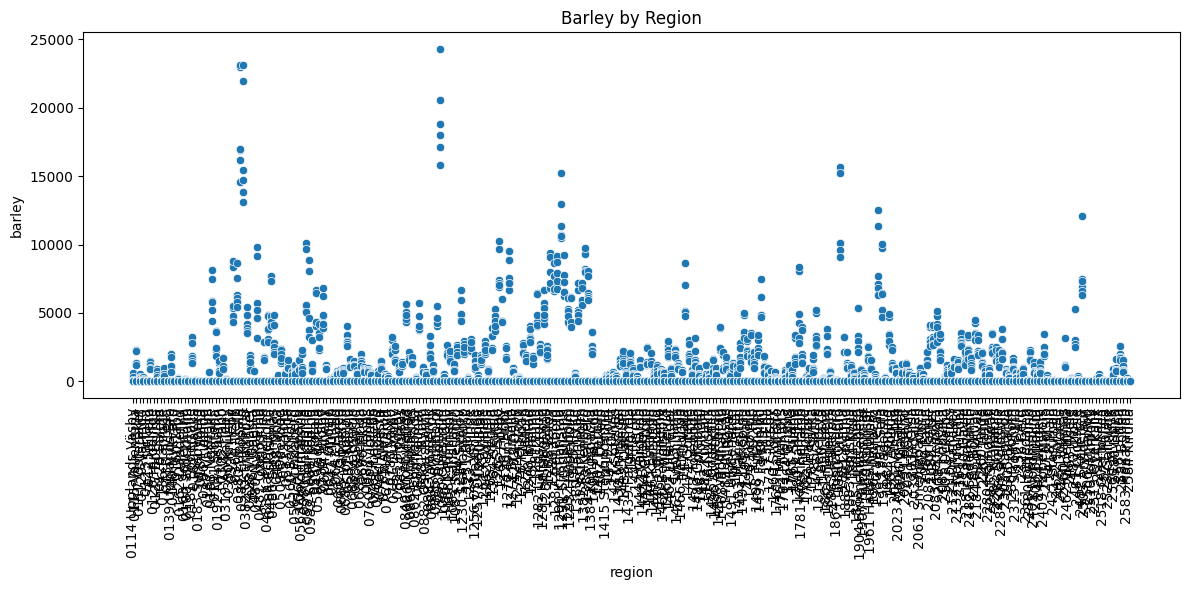

In [3]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x="region", y="barley")
plt.xticks(rotation=90)
plt.title("Barley by Region")
plt.tight_layout()
plt.show()

Unfortunately, there being 290 regions makes the labels on the x-axis basically unreadable, but at least you can kinda see how the barley is distributed.

Scatter plot over barley by region where the sum of barley per region is greater than maximum recorded value of barley

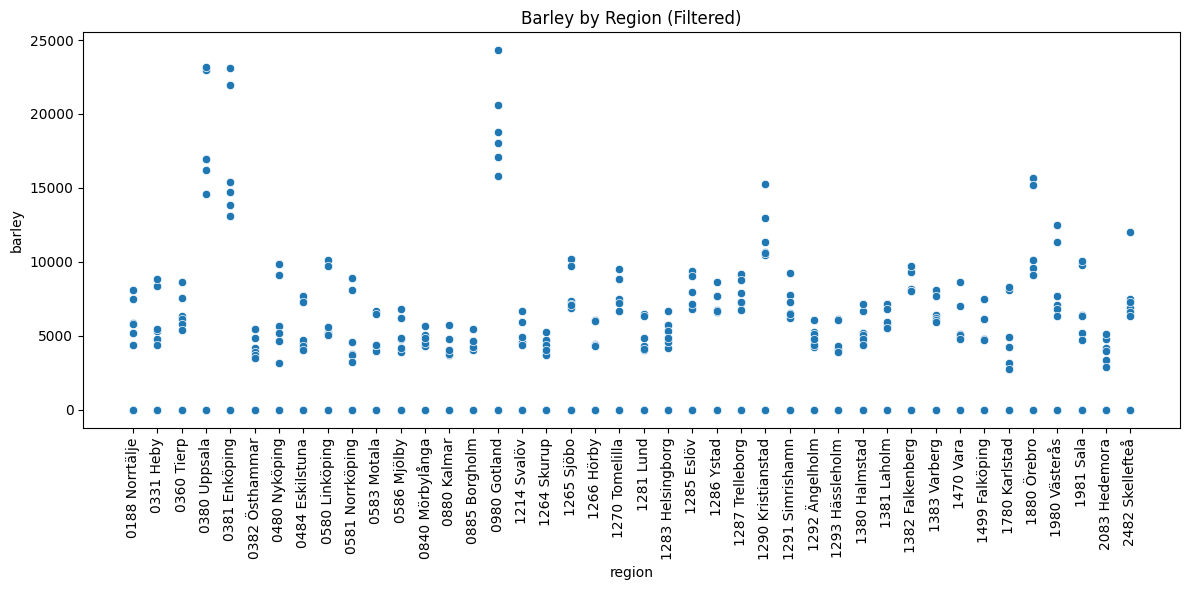

In [4]:
sums = df.groupby("region")["barley"].sum()
valid = sums[sums >= df["barley"].max()].index
filtered_df = df[df["region"].isin(valid)]

plt.figure(figsize=(12, 6))
sns.scatterplot(data=filtered_df, x="region", y="barley")
plt.xticks(rotation=90)
plt.title("Barley by Region (Filtered)")
plt.tight_layout()
plt.show()

Here we see the "big players", regions that in layman terms have produced a lot of barley over the years. You can clearly see that 3 regions strieks above them all; Uppsala, Enköping, and Gotland.

## Box Plot

Box plot over region and barley where the sum of barley per region is greater than maximum recorded value of barley

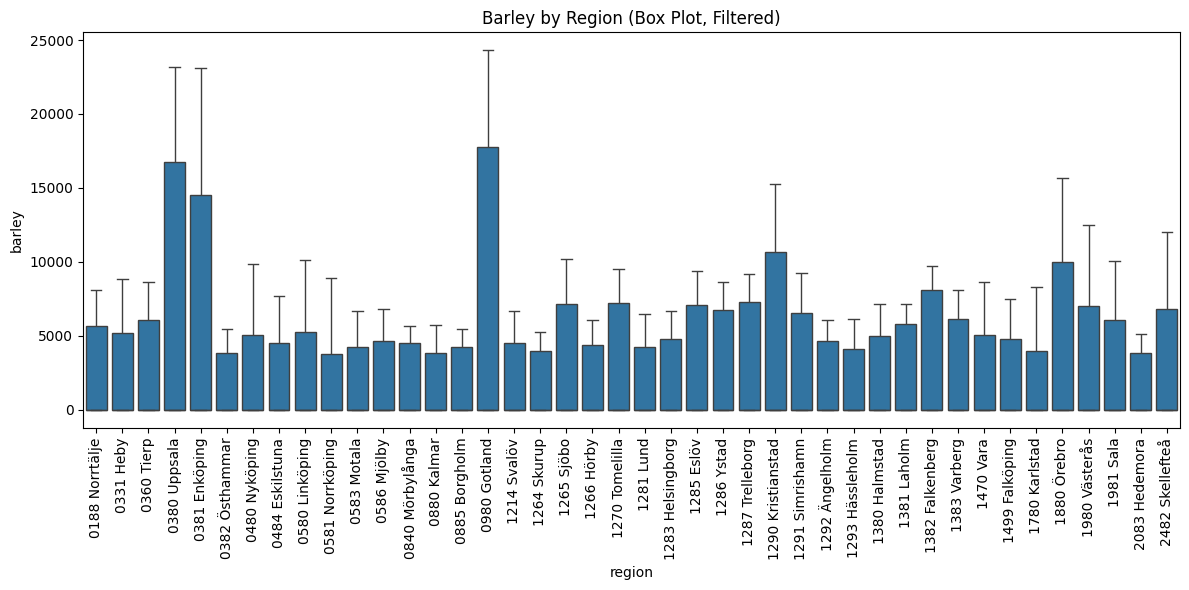

In [5]:
sums = df.groupby("region")["barley"].sum()
valid = sums[sums >= df["barley"].max()].index
filtered_df = df[df["region"].isin(valid)]

plt.figure(figsize=(12, 6))
sns.boxplot(data=filtered_df, x="region", y="barley")
plt.xticks(rotation=90)
plt.title("Barley by Region (Box Plot, Filtered)")
plt.tight_layout()
plt.show()

This is similar to the previous plot, but as a box plot instead.

## Bar Plot

Bar plot over 20 randomly chosen regions and their total sum of barley

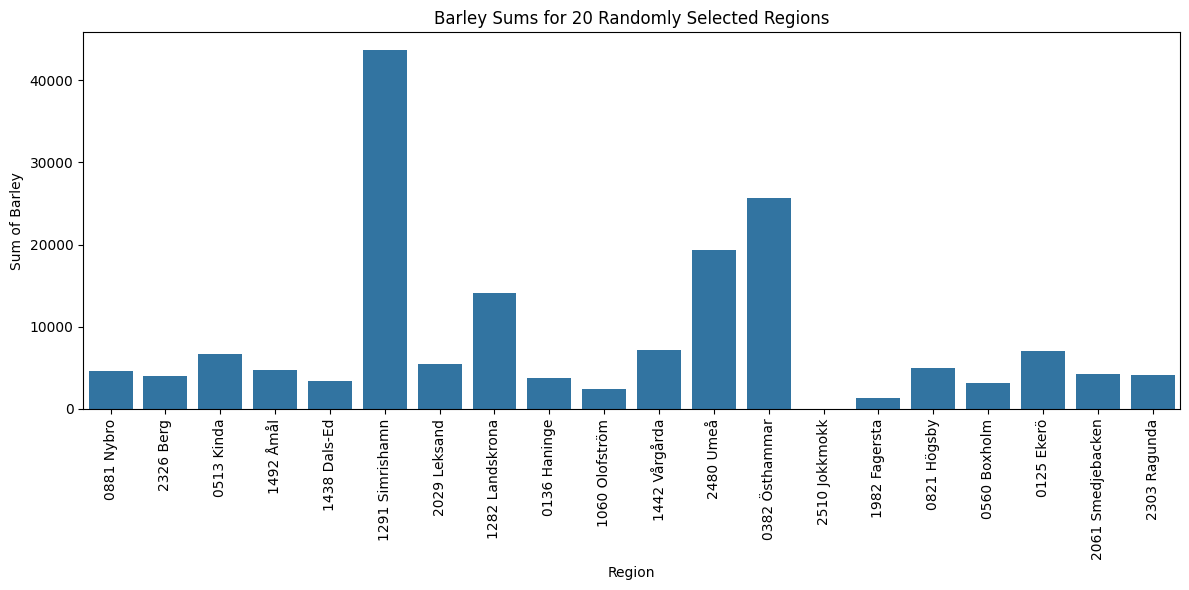

In [6]:
region_sums = df.groupby("region")["barley"].sum()

np.random.seed(42)
rr = np.random.choice(region_sums.index, size=20, replace=False)

s = region_sums.loc[rr]

plt.figure(figsize=(12, 6))
sns.barplot(x=s.index, y=s.values)
plt.xticks(rotation=90)
plt.title("Barley Sums for 20 Randomly Selected Regions")
plt.ylabel("Sum of Barley")
plt.xlabel("Region")
plt.tight_layout()
plt.show()

Bar plot with top 3 regions highlighted in different colors

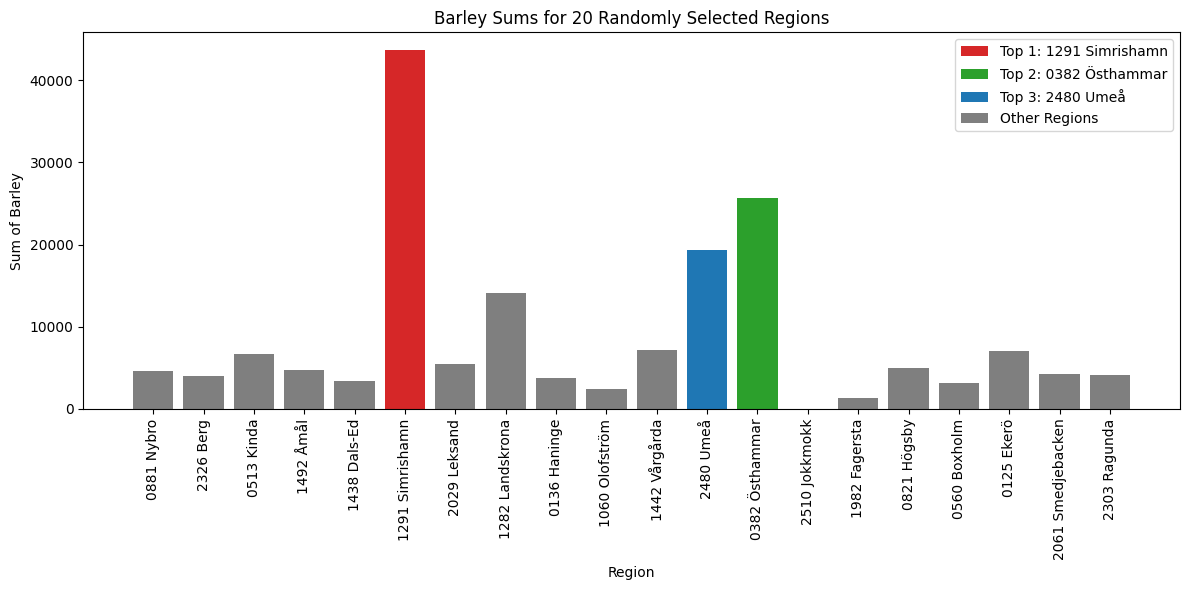

In [7]:
region_sums = df.groupby("region")["barley"].sum()

np.random.seed(42)
sampled_regions = np.random.choice(region_sums.index, size=20, replace=False)
sampled_sums = region_sums.loc[sampled_regions]

top3 = sampled_sums.sort_values(ascending=False).head(3)

colors = []
color_map = {
    top3.index[0]: "tab:red",
    top3.index[1]: "tab:green",
    top3.index[2]: "tab:blue"
}
for region in sampled_sums.index:
    colors.append(color_map.get(region, "tab:gray"))

plt.figure(figsize=(12, 6))
bars = plt.bar(sampled_sums.index, sampled_sums.values, color=colors)
plt.xticks(rotation=90)
plt.title("Barley Sums for 20 Randomly Selected Regions")
plt.ylabel("Sum of Barley")
plt.xlabel("Region")
from matplotlib.patches import Patch
legend_elements = [
    Patch(facecolor="tab:red", label=f"Top 1: {top3.index[0]}"),
    Patch(facecolor="tab:green", label=f"Top 2: {top3.index[1]}"),
    Patch(facecolor="tab:blue", label=f"Top 3: {top3.index[2]}"),
    Patch(facecolor="tab:gray", label="Other Regions")
]
plt.legend(handles=legend_elements)
plt.tight_layout()
plt.show()

# Time Series

Total sum of spring wheat vs total sum of winter wheat per year

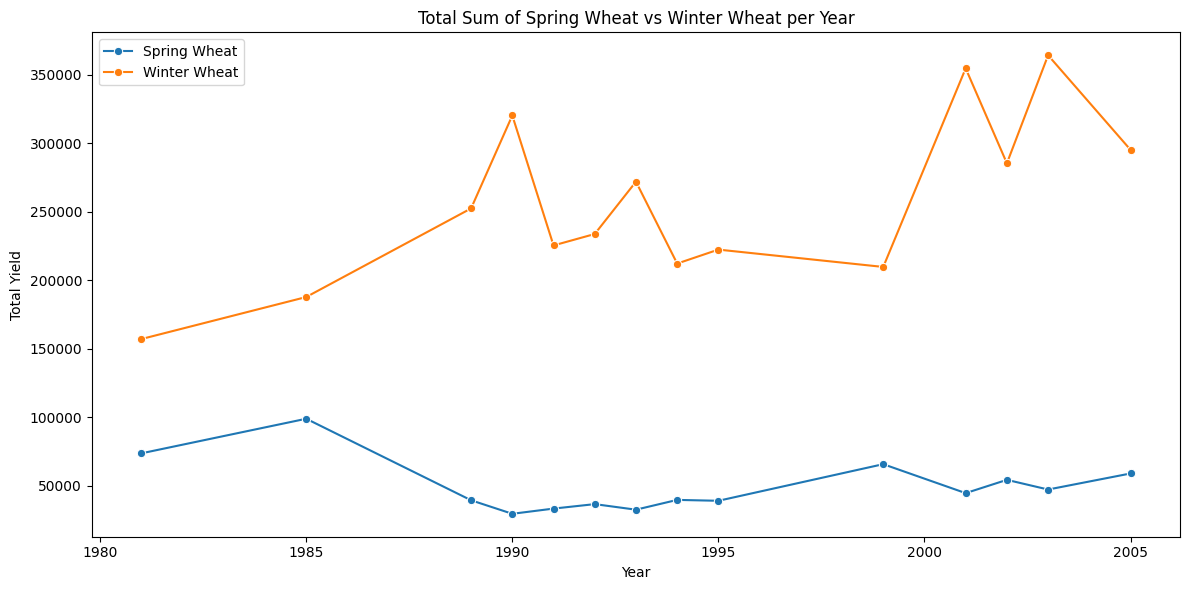

In [8]:
yearly_sums = df.groupby("year")[["spring wheat", "winter wheat"]].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=yearly_sums, x="year", y="spring wheat", marker='o', label="Spring Wheat")
sns.lineplot(data=yearly_sums, x="year", y="winter wheat", marker='o', label="Winter Wheat")
plt.xlabel("Year")
plt.ylabel("Total Yield")
plt.title("Total Sum of Spring Wheat vs Winter Wheat per Year")
plt.legend()
plt.tight_layout()
plt.show()

Here is the total land for spring/winter wheat in Sweden. Interesting to see that winter wheat is in an increasing trend, while spring wheat has more or less flatlined.

Yield over time over spring / winter wheat, rape, turnip rape, and barley.

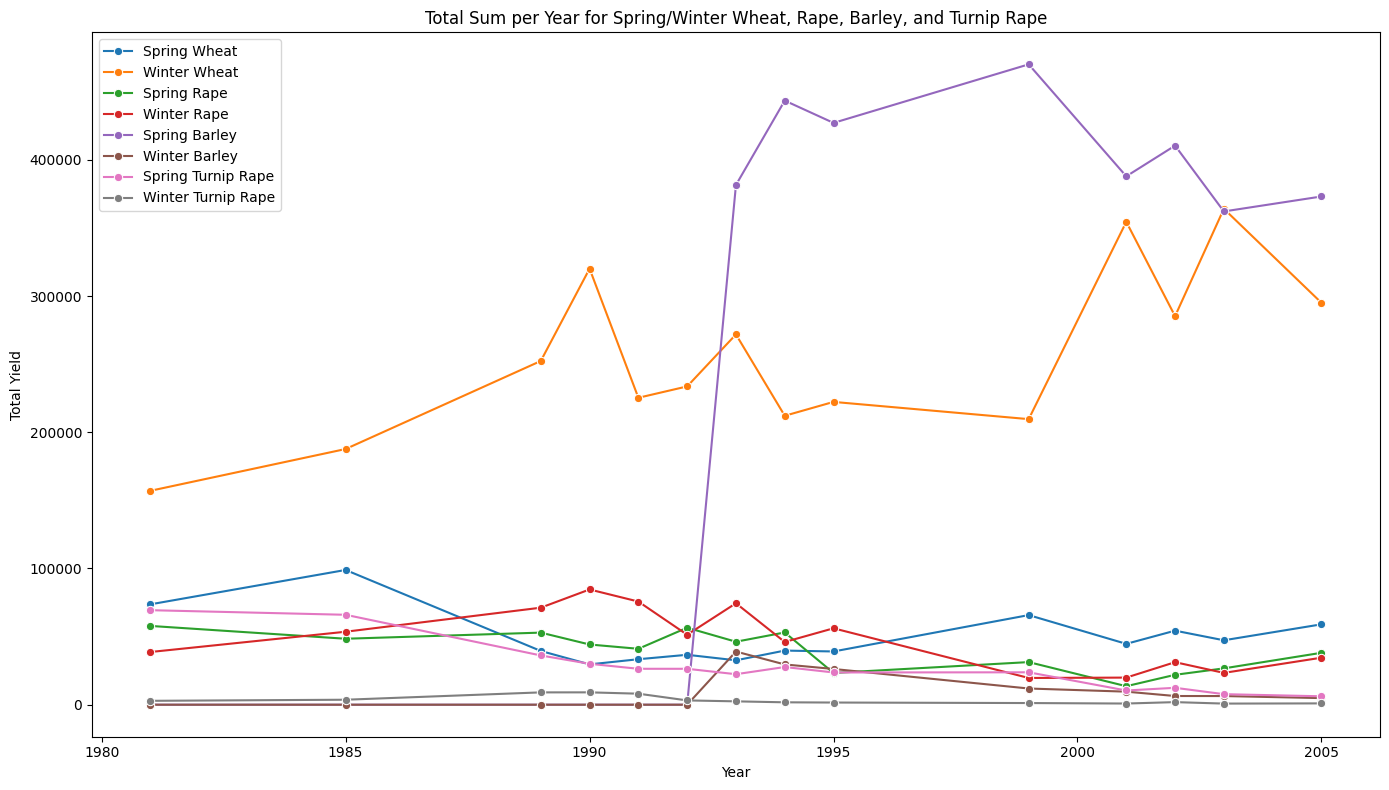

In [9]:
crops = [
    "spring wheat", "winter wheat",
    "spring rape", "winter rape",
    "spring barley", "winter barley",
    "spring turnip rape", "winter turnip rape"
]

yearly_sums = df.groupby("year")[crops].sum().reset_index()

plt.figure(figsize=(14, 8))
for crop in crops:
    sns.lineplot(data=yearly_sums, x="year", y=crop, marker='o', label=crop.title())

plt.xlabel("Year")
plt.ylabel("Total Yield")
plt.title("Total Sum per Year for Spring/Winter Wheat, Rape, Barley, and Turnip Rape")
plt.legend()
plt.tight_layout()
plt.show()

Wow! Spring barley has an insane spike in 1992, it would be interesting to know why. Or maybe the data is faulty?